In [4]:
import numpy as np
import nibabel as nib
from PIL import Image
import os
from matplotlib import pyplot as plt

In [6]:
def generate_slice(image_path,orientation,slice_index):

    img_nifti = nib.load(image_path)

    img = np.array(img_nifti.dataobj)
    
    if orientation == 'sagittal' or orientation == 'sagital':
        return generate_slice_sagittal(slice_index, img)
    
    elif orientation == 'coronal':
        return generate_slice_coronal(slice_index, img)

    elif orientation == 'axial':
        return generate_slice_axial(slice_index, img)
    else:
        print("Invalid")

def generate_slice_sagittal(slice_index, img):

    rot = np.rot90(img, k=3, axes=(1,2)).copy()
    rot = np.rot90(rot, k=2, axes=(0,2)).copy()
    return  rot[slice_index,:,:]
            

def generate_slice_coronal(slice_index, img):

    rot = np.rot90(img, k=3, axes=(0,2)).copy()
    return  rot[:,slice_index,:]

def generate_slice_axial(slice_index, img):

    rot = np.rot90(img, k=3, axes=(0,1)).copy()        
    return  rot[:,:,slice_index]



In [39]:
ad_path = '/Volumes/Extreme SSD/ADNI_PROCESSED/'

slices = list()
for subdir, dirs, files in os.walk(ad_path):
    for file in files:
        if '_' not in file:
            slice = generate_slice(ad_path + file, 'coronal', 43)
            slices.append(slice)
            if len(slices) == 1:
                break


[[ 4.015198   3.7208178  3.1779585 ...  4.9416814  4.4755516  3.9446476]
 [ 4.433832   4.5775876  4.022376  ...  5.3121     4.9068527  4.645301 ]
 [ 4.8272257  5.230812   5.0285983 ...  6.316085   6.2946706  6.2578435]
 ...
 [ 5.184      8.483392  10.148098  ...  2.4827092  1.9352087  1.5086429]
 [ 1.915578   4.6211977  7.613433  ...  1.6766818  1.4633589  1.0104964]
 [ 1.0637083  2.0261235  4.7109547 ...  1.2240764  0.8270077  1.0366578]]


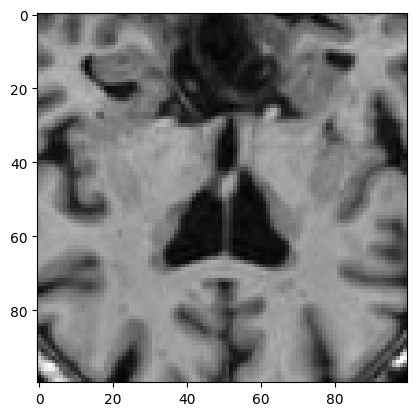

In [40]:
for slice in slices:
    print(slice)
    plt.imshow(slice, cmap='gray')
    plt.show()

In [45]:

arr1 = slices[0]
arr1 = arr1 * 255.0/arr1.max()  
im = Image.fromarray(arr1)
im = im.convert('L')
im.save('test.png')
#plt.imsave('test.png', im, cmap='gray')

im2 = Image.open(r'test.png')

#print(im)
#print(im2)

arr2 = np.array(im2)

